# Regresja wielomianowa

Regresja wielomianowa jest nieliniowym sposobem wyznaczania zależności między cechami niezależnymi, a cechą zależną.

Aby wyznaczyć wielomian przybliżający wykorzystuje się dwie klasy: 

* **PolynomialFeatures** - przekształca zbiór x na nową macierz zawierającą wszystkie kombinacje wielomianowe dla podanego stopnia
* **LinearRegression** - oblicza wagi (tak jak w regresji liniowej).

## Import bibliotek i przygotowanie danych

Jako dane posłużą mi wygenerowane punkty z przedziału [-20, 20]. Przypisuję im wartości wyznaczone za pomocą funkcji $ f(x) = x^2 -5x$. Dodatkowo dodaje szum za pomocą **np.random.randn()**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

x = np.arange(-20, 20, 2)
y = x**2 - 5*x + np.random.randn(len(x)) * 10

Wyświetlam wygenerowane punkty za pomocą **plt.scatter()**.

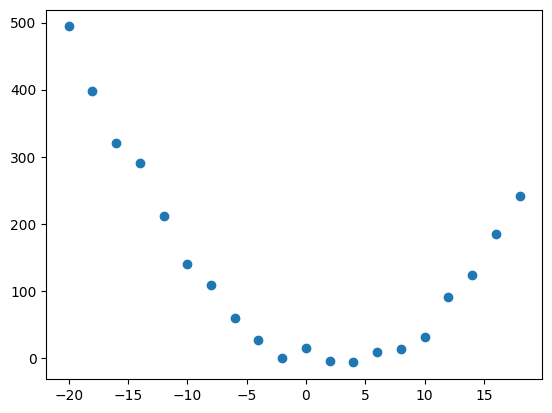

In [2]:
plt.scatter(x, y)
plt.show()

## Uczenie modelu

Wymogiem do obliczenia regresji jest przekształcenie zbioru treningowego do postaci wektora.

Następnie tworzę **Pipeline**, który najpierw przekształci macierz, a następnie obliczy wagi. Jako argument **PolynomialFeatures** podaje stopień obliczanej funkcji wielomianowej.

In [3]:
x_reshaped = x.reshape(-1, 1)

model = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('linear', LinearRegression())
])
model.fit(x_reshaped, y)

,steps,"[('poly', ...), ('linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


## Mierzenie skuteczności modelu

Na początku dokonuję predykcji wygenerowanych punktów. W ten sposób porównam różnice pomiędzy wartościami oryginalnymi i przewidzianymi.

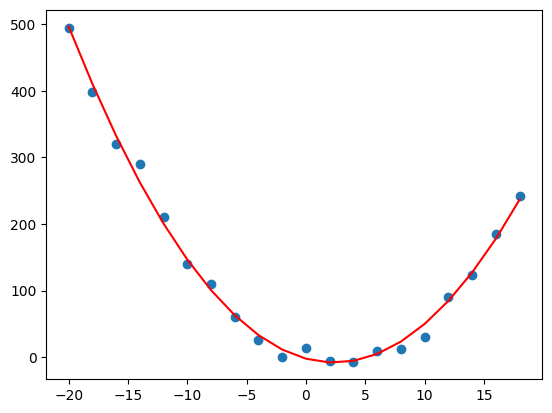

In [4]:
y_pred = model.predict(x_reshaped)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

Dodatkowo obliczam metryki mierzące skuteczność regresji:

**Współczynnik determinacji R²**: mierzy jak dobrze model wyjaśnia zmienność danych. Przyjmuje wartości od 0 do 1, gdzie 0 oznacza brak wyjaśniania zmienności, a 1 idealne dopasowanie do danych.

**Błąd średniokwadratowy (Mean Squared Error)**: mierzy średnią kwadratową różnicę między rzeczywistymi wartościami a przewidywanymi. Im mniejszy MSE, tym lepszy model.

**Błąd średniabsolutny (Mean Absolute Error)**: mierzy średnią wartość bezwzględnych różnic między rzeczywistymi a przewidywanymi wartościami. Jest to mniej wrażliwe na duże błędy niż MSE.

**Błąd średniokwadratowy z pierwiastkiem**: pierwiastek kwadratowy z MSE, co sprawia, że jednostka błędu jest taka sama jak jednostka zmiennej zależnej (czyli wartości, które model próbuje przewidzieć).

In [5]:
r2 = r2_score(y, y_pred)
print(f"Współczynnik determinacji R²: {r2:.4f}")

mse = mean_squared_error(y, y_pred)
print(f"Błąd średniokwadratowy: {mse:.2f}")

mae = mean_absolute_error(y, y_pred)
print(f"Błąd średniabsolutny: {mae:.2f}")

rmse = np.sqrt(mse)
print(f"Błąd średniokwadratowy z pierwiastkiem: {rmse:.2f}")

Współczynnik determinacji R²: 0.9942
Błąd średniokwadratowy: 118.63
Błąd średniabsolutny: 8.87
Błąd średniokwadratowy z pierwiastkiem: 10.89
